In [3]:
!pip install ruptures

In [4]:


import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt


In [5]:

# Load the processed data
df = pd.read_csv(r"C:\Users\naman\OneDrive\Desktop\PRJ\data\processed\merged_data.csv")
df['ds'] = pd.to_datetime(df['ds'])


In [6]:

# Sort to avoid any date-related shuffling
df = df.sort_values(by='ds')


In [7]:

# Extract the ILI signal
signal = df['y'].values


In [8]:

# Apply changepoint detection using PELT with 'rbf' model
model = rpt.Pelt(model="rbf").fit(signal)


In [9]:

# Penalty controls sensitivity — higher = fewer changepoints
change_points = model.predict(pen=5)  # You can tune this value


<Figure size 1400x600 with 0 Axes>

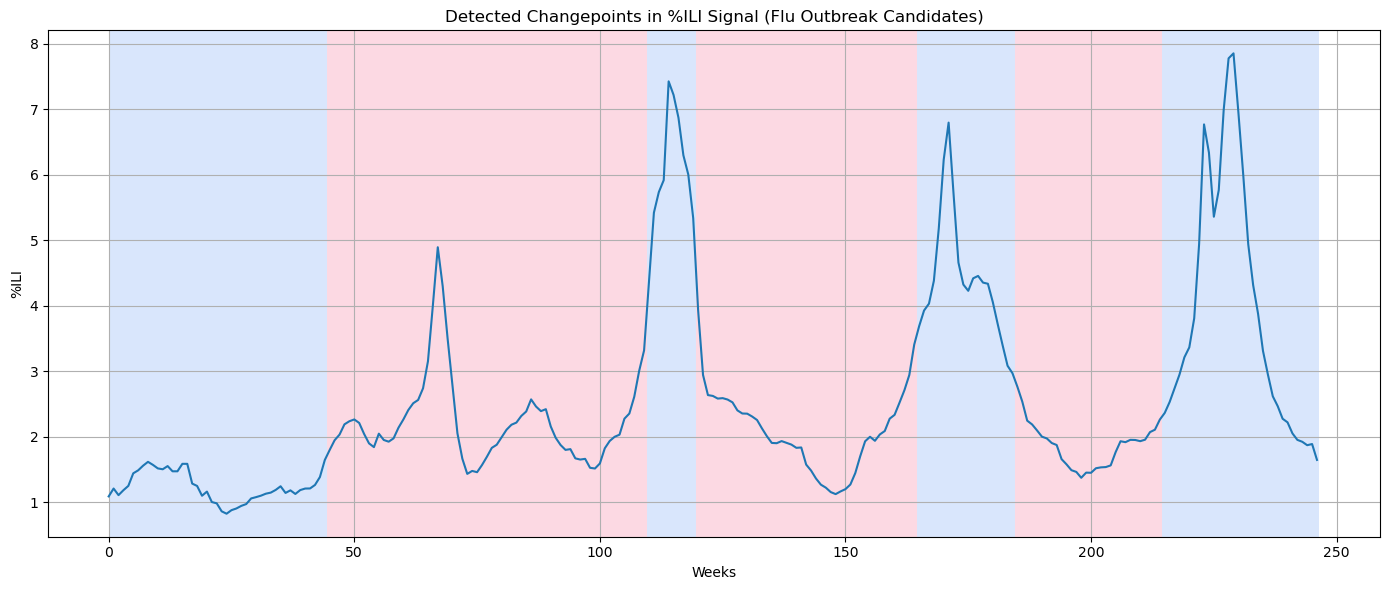

In [10]:

# Plot signal with detected change points
plt.figure(figsize=(14, 6))
rpt.display(signal, change_points, figsize=(14, 6))
plt.title("Detected Changepoints in %ILI Signal (Flu Outbreak Candidates)")
plt.xlabel("Weeks")
plt.ylabel("%ILI")
plt.grid(True)
plt.tight_layout()
plt.show()
